In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# para la validación cruzada
import math as mt
def average(numbers):
    """
    Calcula la media aritmética simple
    """
    try:
        return float(sum(numbers)) / max(len(numbers), 1)
    except ZeroDivisionError:
        return 0

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
y_test[0]

9

In [7]:
%matplotlib inline

9


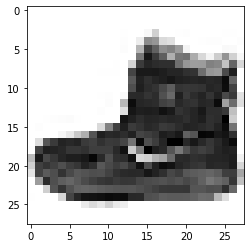

In [8]:
import matplotlib.pyplot as plt

image_index = 0
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Normalizar los píxeles de las imágenes

In [9]:
img_rows, img_cols = 28, 28


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train , x_test = x_train/255.0 , x_test/255.0

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train.size/784

60000.0

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Convertimos en valores booleanos la característica a predecir (necesario )

In [13]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Diseñando el modelo
Ahora hay que diseñar la arquitectura del modelo de CNN que vamos a utilizar. 

In [14]:
batch_size     = 10  
n_classes      = 10
n_epochs       = 50  
img_rows, img_cols = 28,28
n_filters      = 32

# para la validación cruzada
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [   
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        mode='max',
        verbose=1),
    ModelCheckpoint(
        './model2',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=0)
]

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))  # suele añadirse (tradicion en cnn)
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

Compilar el modelo

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenar el modelo

In [19]:
from sklearn.model_selection import KFold
seed = 7
np.random.seed(seed)
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_train)

acc_scores = list()

for fold, (train_index, test_index) in enumerate(kf.split(x_train)):
    print('\n Fold %d' % (fold))

    x_tr, x_v = x_train[train_index], x_train[test_index]
    y_tr, y_v = y_train[train_index], y_train[test_index]

    model.fit(
        x_tr,
        y_tr,
        epochs=n_epochs,
        validation_data=(x_v, y_v),
        verbose=2,
        batch_size=batch_size,
        callbacks=callbacks,
        shuffle=True
    )

    acc = model.evaluate(x_v, y_v, verbose=0)
    acc_scores.append(acc[1])

    print('Fold %d: Accuracy %.2f%%' % (fold, acc[1] * 100))

print('Accuracy scores: ', acc_scores)

mean_acc = average(acc_scores)
standard_deviation_acc = mt.sqrt(sum_of_square_deviation(acc_scores, mean_acc))


 Fold 0
Epoch 1/50
4800/4800 - 39s - loss: 0.5593 - accuracy: 0.7974 - val_loss: 0.3499 - val_accuracy: 0.8697
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 2/50
4800/4800 - 42s - loss: 0.3933 - accuracy: 0.8587 - val_loss: 0.3209 - val_accuracy: 0.8788
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 3/50
4800/4800 - 41s - loss: 0.3551 - accuracy: 0.8708 - val_loss: 0.2774 - val_accuracy: 0.8952
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 4/50
4800/4800 - 44s - loss: 0.3258 - accuracy: 0.8809 - val_loss: 0.2690 - val_accuracy: 0.9008
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 5/50
4800/4800 - 44s - loss: 0.3088 - accuracy: 0.8866 - val_loss: 0.2703 - val_accuracy: 0.8988
Epoch 6/50
4800/4800 - 43s - loss: 0.2971 - accuracy: 0.8901 - val_loss: 0.2552 - val_accuracy: 0.9072
INFO:tensorflow:Assets written to: .\model2\assets
Epoch 7/50
4800/4800 - 43s - loss: 0.2875 - accuracy: 0.8941 - val_loss: 0.2570 - val_accuracy: 0.9071
Epoch 8/50
4800

Epoch 6/50
4800/4800 - 44s - loss: 0.2093 - accuracy: 0.9249 - val_loss: 0.1559 - val_accuracy: 0.9443
Epoch 7/50
4800/4800 - 45s - loss: 0.2016 - accuracy: 0.9284 - val_loss: 0.1266 - val_accuracy: 0.9546
Epoch 8/50
4800/4800 - 46s - loss: 0.2048 - accuracy: 0.9265 - val_loss: 0.1378 - val_accuracy: 0.9473
Epoch 9/50
4800/4800 - 45s - loss: 0.2066 - accuracy: 0.9265 - val_loss: 0.1332 - val_accuracy: 0.9501
Epoch 10/50
4800/4800 - 45s - loss: 0.2031 - accuracy: 0.9278 - val_loss: 0.1506 - val_accuracy: 0.9443
Epoch 11/50
4800/4800 - 45s - loss: 0.2010 - accuracy: 0.9288 - val_loss: 0.1387 - val_accuracy: 0.9482
Epoch 00011: early stopping
Fold 4: Accuracy 94.82%
Accuracy scores:  [0.9106666445732117, 0.9350000023841858, 0.9434999823570251, 0.9425833225250244, 0.9482499957084656]


NameError: name 'sum_of_square_deviation' is not defined

In [21]:
mean_acc = average(acc_scores)
mean_acc

0.9359999895095825

In [22]:
import time
start_time = time.time()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,          # nº de veces q se repite el entrenam.
          verbose=1,
          validation_data=(x_test, y_test))

training_time = time.time() - start_time
print(training_time)


Epoch 1/50
6000/6000 [==============================] - 49s 8ms/step - loss: 0.2209 - accuracy: 0.9224 - val_loss: 0.2949 - val_accuracy: 0.9082
Epoch 2/50
6000/6000 [==============================] - 50s 8ms/step - loss: 0.2104 - accuracy: 0.9245 - val_loss: 0.3076 - val_accuracy: 0.9106
Epoch 3/50
6000/6000 [==============================] - 49s 8ms/step - loss: 0.2152 - accuracy: 0.9236 - val_loss: 0.3089 - val_accuracy: 0.9096
Epoch 4/50
6000/6000 [==============================] - 45s 8ms/step - loss: 0.2104 - accuracy: 0.9247 - val_loss: 0.3253 - val_accuracy: 0.9067
Epoch 5/50
6000/6000 [==============================] - 42s 7ms/step - loss: 0.2083 - accuracy: 0.9240 - val_loss: 0.3058 - val_accuracy: 0.9083
Epoch 6/50
6000/6000 [==============================] - 43s 7ms/step - loss: 0.2047 - accuracy: 0.9255 - val_loss: 0.2941 - val_accuracy: 0.9041
Epoch 7/50
6000/6000 [==============================] - 41s 7ms/step - loss: 0.2111 - accuracy: 0.9240 - val_loss: 0.3120 - val_ac

Una vez entrenado el modelo, vamos a probarlo con el conjunto de test

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32124078273773193
Test accuracy: 0.9107000231742859


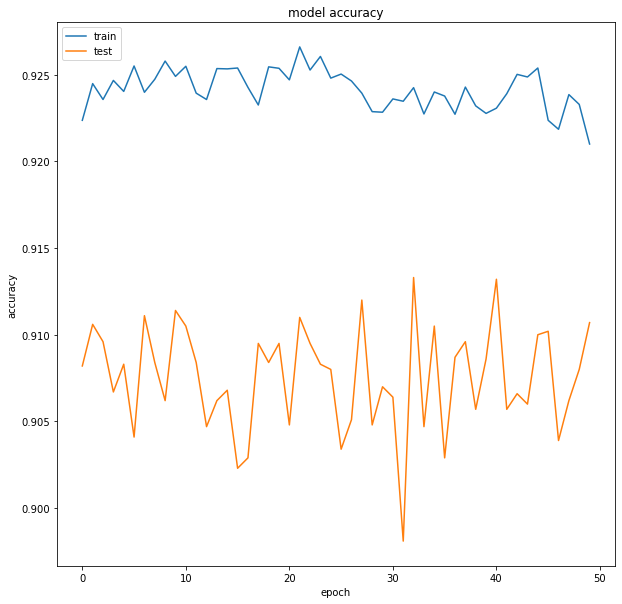

In [25]:
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()